In [52]:
import numpy as np
import pandas as pd
import glob
import os
from odf import text, teletype
from odf.opendocument import load
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


## Function

In [53]:
def calculate_subtraction(column):
    # Split each entry by the '-' delimiter
    split_values = column.str.split('-', expand=True)
    # Convert the resulting substrings into numbers
    num1 = pd.to_numeric(split_values[0])
    num2 = pd.to_numeric(split_values[1])
    # Calculate the difference between the two numbers
    result = num1 - num2
    return result

In [54]:

# Path to your ODS file
ods_file_path = '/home/prompt1203/FRA532_Exam/src/expresult.ods'

# Load the ODS file
doc = load(ods_file_path)

# Extract text from the ODS file
content = []
for text_node in doc.getElementsByType(text.P):
    content.append(teletype.extractText(text_node))

# Print the extracted content
for line in content:
    print(line)


default
0.025
0.02
x
y
cov
0.025
cov
0.005
cov
0.045
1
201.4
25.7-20
x
y
2
201
20-14.1
1
201.6
20-17.2
1
201.9
20-9.2
1
202.3
20-10.7
3
201.4
22.2-20
2
202
27.3-20
2
201.1
25.7-20
2
201.4
29.4-20
4
201.5
20-9.9
3
201.6
20-14.3
3
202.8
20-13.4
3
201.7
20-15.4
5
200.9
33.4-20
4
202.3
25.5-20
4
201.9
26.7-20
4
202
27.5-20
6
201.3
20-10.9
5
200.5
20-17.1
5
202.4
20-15.1
5
201.9
20-18.7
7
200.4
29.2-20
6
201.4
31.8-20
6
201.5
29.4-20
6
201.9
29.3-20
8
201.2
20-7.6
7
201.7
20-13
7
201.2
20-11.7
7
201.6
20-11.1
9
199.8
36.9-20
8
202
27.9-20
8
201.2
28.5-20
8
201.1
27.8-20
10
200.9
20-10.8
9
201.4
20-11.4
9
202
20-7.2
9
201.5
20-16.5
11
201.6
20-10.2
10
201.9
29-20
10
202.4
25.8-20
10
201.8
20-17.1
12
201.7
27.4-20
13
202
20-5.2
14
201.2
28.8-20
15
201.6
20-8.6
16
201.6
31.1-20
17
201.9
20-17.2
18
201.6
33.6-20
19
202.4
20-10.5
20
201
20-17.0
21
201.7
25-20
22
201.5
20-16.9
23
200.3
20-13.1
24
201.8
33.3-20
25
202
20-19.4
26
201.4
20-13.0
27
202.4
26.7-20
28
200.3
20-12.9
29
201.5
23.8-20
30
2

## x เเละ y ที่หุ่นยนต์เดินได้

In [55]:
x_y_robot_ground_truth_csv = '/home/prompt1203/FRA532_Exam/src/expresult.csv'

x_y_robot_ground_truth_list = []
x_y_robot_ground_truth_data = pd.read_csv(x_y_robot_ground_truth_csv, index_col=False)
x_y_robot_ground_truth_list.append(x_y_robot_ground_truth_data)
x_y_robot_ground_truth = pd.concat(x_y_robot_ground_truth_list, ignore_index=True)

x_y_robot_ground_truth.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,default,0.025,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,x,y,NaN,NaN,cov,0.025,NaN,cov,0.005,NaN,cov,0.045
3,NaN,1,201.4,25.7-20,NaN,NaN,x,y,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2,201,20-14.1,NaN,1.0,201.6,20-17.2,1.0,201.9,20-9.2,1.0,202.3,20-10.7


### x เเละ y เมื่อทำการปรับค่า cov เป็น 0.005 , 0.025 เเละ 0.045

In [56]:
x_y_robot_cov5 = x_y_robot_ground_truth.iloc[4:14, 9:11].rename(columns={'Unnamed: 9':'x_cov5', 'Unnamed: 10':'raw_y_cov5'})
x_y_robot_cov25 = x_y_robot_ground_truth.iloc[4:14, 6:8].rename(columns={'Unnamed: 6':'x_cov25', 'Unnamed: 7':'raw_y_cov25'})
x_y_robot_cov45 = x_y_robot_ground_truth.iloc[4:14, 12:].rename(columns={'Unnamed: 12':'x_cov45', 'Unnamed: 13':'raw_y_cov45'})

x_y_robot_cov5['y_cov5'] = calculate_subtraction(x_y_robot_cov5['raw_y_cov5'])
x_y_robot_cov25['y_cov25'] = calculate_subtraction(x_y_robot_cov25['raw_y_cov25'])
x_y_robot_cov45['y_cov45'] = calculate_subtraction(x_y_robot_cov45['raw_y_cov45'])

x_y_robot_cov5 = x_y_robot_cov5.drop(columns=["raw_y_cov5"]).reset_index(drop =True)
x_y_robot_cov25 = x_y_robot_cov25.drop(columns=["raw_y_cov25"]).reset_index(drop =True)
x_y_robot_cov45 = x_y_robot_cov45.drop(columns=["raw_y_cov45"]).reset_index(drop =True)

multi_index = pd.MultiIndex.from_product([['cov_5', 'cov_25', 'cov_45'], ['x', 'y']], names=['lv1', 'lv_2'])
all_x_y_cov_df = pd.concat([x_y_robot_cov5, x_y_robot_cov25, x_y_robot_cov45], axis=1)
all_x_y_cov_df.columns = multi_index
all_x_y_cov_df.head()



lv1   cov_5       cov_25      cov_45     
lv_2      x     y      x    y      x    y
0     201.9  10.8  201.6  2.8  202.3  9.3
1     201.1   5.7    202  7.3  201.4  9.4
2     202.8   6.6  201.6  5.7  201.7  4.6
3     201.9   6.7  202.3  5.5    202  7.5
4     202.4   4.9  200.5  2.9  201.9  1.3

### x เเละ y เมื่อทำการสั่ง cmd_vel 0.1 m/s ในเวลา 20 วินาที

In [57]:
x_y_robot = x_y_robot_ground_truth.iloc[3:, 2:4]
x_y_robot = x_y_robot.rename(columns={'Unnamed: 2':'x_robot', 'Unnamed: 3':'raw_y_robot'})

x_y_robot['y_robot'] = calculate_subtraction(x_y_robot['raw_y_robot'])
x_y_robot = x_y_robot.drop(columns=["raw_y_robot"]).reset_index(drop = True)
x_y_robot.head()

,x_robot,y_robot
0,201.4,5.7
1,201,5.9
2,201.4,2.2
3,201.5,10.1
4,200.9,13.4


# **3.การทดลองหาความสัมพันธ์ของ Cmd_Vel และการเคลื่อนที่ของหุ่นยนต์**

ตัวแปรต้น: path, Cmd_vel 

ตัวแปรตาม: linear_velocity_real , linear_velocity_wheel_odom , angular_velocity_real , angular_velocity_wheel_odom 

ตัวแปรควบคุม: environment 

## **สมมติฐาน** 

เมื่อเปรียบเทียบ ค่า cmd_vel ที่สั่งกับค่า real value และ ค่า wheel odom แล้วค่า cmd vel มีค่ามากสุดและ real value และ wheel odom มีค่าใกล้เคียงกัน 

## **ขั้นตอนการทดลอง** 

วาง path เป็นเส้นตรงแล้วคำนวณความเร็วเชิงเส้นจากระยะที่หุ่นยนต์ทำได้เทียบกับเวลาที่ใช้ เทียบกับ cmd_vel และคำนวณความเร็วเชิงมุมจากการหมุน 90 องศา เทียบกับ cmd vel ภายในเวลา 10 วินาที 

จากการเก็บผลการทดลองที่ 2 สามารถนำผลการทดลองที่ 2 มาใช้ในการคำนวณความเร็วของหุ่นยนต์ เเละนำไปเปรียบเทียบกับ cmd_vel ที่สั่งหุ่นยนต์ โดย cmd_vel ที่ใช้ในการสั่งอยู่ที่ 0.1 m/s โดยสั่งให้หุ่นยนต์เดินเป็นเวลา 20 วินาที 



## **ผลการทดลอง**

In [58]:
ex2_3_data_all_value = pd.DataFrame()
ex2_3_data_all_value_list = []

folder_path = '/home/prompt1203/FRA532_Exam/src/pmzbbot_control/experimentresult/experiment2'
file_name_format = 'Experiment_2_id_'

# Count the number of CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, f'{file_name_format}*.csv'))
num_csv_files = len(csv_files)
# print(csv_files)

for i in range(1, num_csv_files+1):
    csv_path = f'{folder_path}/{file_name_format}{i}.csv'
    ex2_data = pd.read_csv(csv_path, index_col=False)
    ex2_3_data_all_value_list.append(ex2_data.iloc[[-1]])

ex2_3_data_all_value = pd.concat(ex2_3_data_all_value_list, ignore_index=True)
ex2_3_data_all_value.head()

,time,wheel_odom_x,wheel_odom_y,odom_filter_x,odom_filter_y,true_x,true_y
0,20.200725,2.010064,0.004815,1.994200,-0.009196,2.02,0.0
1,20.201835,2.002676,0.011979,1.998723,0.019753,2.02,0.0
2,20.201112,2.006618,0.015747,1.987791,0.011144,2.02,0.0
3,20.201881,2.004398,-0.026071,1.999405,-0.036554,2.02,0.0
4,20.200556,2.014957,0.004623,2.008251,-0.029003,2.02,0.0


In [59]:
time_df = pd.DataFrame(ex2_3_data_all_value.iloc[:-1, 0]).rename(columns={'time':'time(s)'})                     # time
x_y_time_df = pd.concat([time_df, x_y_robot], axis=1)           # time, x, y
distance_df = pd.DataFrame(np.sqrt((x_y_time_df['x_robot'].astype(float)**2) + (x_y_time_df['y_robot'].astype(float)**2)), columns=['distance(m)'])
cal_vel_data_df = pd.concat([x_y_time_df, distance_df], axis = 1)
vel_df = pd.DataFrame(cal_vel_data_df['distance(m)'].divide(100).divide(cal_vel_data_df['time(s)']), columns=['real_vel'])
real_vel_df = pd.concat([cal_vel_data_df, vel_df], axis = 1)
real_vel_df['vel_error'] = 0.1-real_vel_df['real_vel']
real_vel_df.head()

,time(s),x_robot,y_robot,distance(m),real_vel,vel_error
0,20.200725,201.4,5.7,201.480644,0.099739,0.000261
1,20.201835,201,5.9,201.086573,0.099539,0.000461
2,20.201112,201.4,2.2,201.412016,0.099703,0.000297
3,20.201881,201.5,10.1,201.752968,0.099868,0.000132
4,20.200556,200.9,13.4,201.346393,0.099674,0.000326


mean of velocity error: 0.00022592128980311276


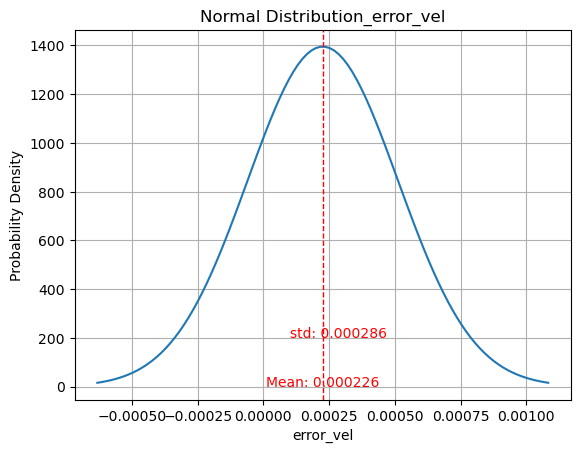

In [69]:
mean_error_vel = np.mean(real_vel_df['vel_error'])
var_error_vel = np.var(real_vel_df['vel_error'])
sigma_error_vel= np.sqrt(var_error_vel)
# Generate x values
print('mean of velocity error: ' + str(mean_error_vel))
norm_error_vel = np.linspace(mean_error_vel - 3 * sigma_error_vel, mean_error_vel + 3 * sigma_error_vel, 100)
# Plot the normal distribution
plt.plot(norm_error_vel, stats.norm.pdf(norm_error_vel, mean_error_vel, sigma_error_vel))
plt.axvline(mean_error_vel, color='r', linestyle='dashed', linewidth=1)
plt.text(mean_error_vel, 0.003, f'Mean: {mean_error_vel:.6f}', color='r', fontsize=10,ha='center')
plt.text(sigma_error_vel, 200, f'std: {sigma_error_vel:.6f}', color='r', fontsize=10, ha='center')
plt.xlabel("error_vel")
plt.ylabel("Probability Density")
plt.title("Normal Distribution_error_vel")
plt.grid(True)
plt.show()

## **สรุปผลการทดลอง**

จากการทดลอง เเละเก็บผล สามารถสรุปได้ว่าเป็นไปตามสมมติฐาน โดยที่ความเร็วของหุ่นยนต์ที่เคลื่อนที่จริงนั้นมีค่าใกล้เคียงกับความเร็วที่สั่งไป (cmd_vel) โดยมีค่า error เฉลี่ยอยู่ที่ 0.0002259

## 4.การทดลองปรับค่า Covariance ของ Wheel Odometry และ Imu 

ตัวแปรต้น: Covariance  

ตัวแปรตาม: Position 

ตัวแปรควบคุม: Path ที่ใช้ในการหา Covariance 

### สมมติฐาน  

การปรับจูนค่า Covariance ที่ได้จาก path การเดินของหุ่นยนต์ เมื่อทำการ track position จะได้ค่าที่แม่นยำมากขึ้น 

### ขั้นตอนการทดลอง  

ทำการหา covariance จาก path วงกลมและเส้นตรง และนำ covariance ที่ได้ไป test กับ Path เส้นตรง และสี่เหลี่ยม จากนั้นวัดผลเป็น pose ที่เกิดขึ้น 

### สรุปผลการทดลอง 

In [61]:
ex4_data_cov_5_last = pd.DataFrame()
ex4_data_cov_25_last = pd.DataFrame()
ex4_data_cov_45_last = pd.DataFrame()

ex4_data_cov_5_list = []
ex4_data_cov_25_list = []
ex4_data_cov_45_list = []

cov_list = [0.005, 0.025, 0.045]

folder_path = '/home/prompt1203/FRA532_Exam/src/pmzbbot_control/experimentresult/experiment2'
file_name_format = f'Experiment_3_id_'

# Count the number of CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, f'{file_name_format}*.csv'))
num_csv_cov_files = len(csv_files)/3
# print(num_csv_cov_files)

for i in range(1, int(num_csv_cov_files)+1):
    # for j in range(0, len(cov_list)):
    csv_path_cov_5 = f'{folder_path}/{file_name_format}{i}_cov_0.005.csv'
    csv_path_cov_25 = f'{folder_path}/{file_name_format}{i}_cov_0.025.csv'
    csv_path_cov_45 = f'{folder_path}/{file_name_format}{i}_cov_0.045.csv'
    
    ex4_data_cov_5 = pd.read_csv(csv_path_cov_5, index_col=False)
    ex4_data_cov_25 = pd.read_csv(csv_path_cov_25, index_col=False)
    ex4_data_cov_45 = pd.read_csv(csv_path_cov_45, index_col=False)

    ex4_data_cov_5_list.append(ex4_data_cov_5.iloc[[-1]])
    ex4_data_cov_25_list.append(ex4_data_cov_25.iloc[[-1]])
    ex4_data_cov_45_list.append(ex4_data_cov_45.iloc[[-1]])

    ex4_data_cov_5_last = pd.concat(ex4_data_cov_5_list, ignore_index=True)
    ex4_data_cov_25_last = pd.concat(ex4_data_cov_25_list, ignore_index=True)
    ex4_data_cov_45_last = pd.concat(ex4_data_cov_45_list, ignore_index=True)


# ex4_data_cov_5_last.head()
# ex4_data_cov_25_last.head()
odom_cov_5 = ex4_data_cov_5_last.iloc[:, 3:5]
odom_cov_25 = ex4_data_cov_25_last.iloc[:, 3:5]
odom_cov_45 = ex4_data_cov_45_last.iloc[:, 3:5]
odom_cov_25.head()


,odom_filter_x,odom_filter_y
0,1.996300,0.029908
1,2.009512,0.014994
2,1.992762,0.033808
3,2.003121,0.015046
4,1.993708,-0.029581


In [62]:
multi_index = pd.MultiIndex.from_product([['cov_5', 'cov_25', 'cov_45'], ['odom_filter_x', 'odom_filter_y']], names=['lv1', 'lv_2'])
all_cov_df = pd.concat([odom_cov_5, odom_cov_25, odom_cov_45], axis=1)
all_cov_df.columns = multi_index
all_cov_df = all_cov_df.multiply(100)

all_cov_df = pd.concat([all_cov_df, all_x_y_cov_df], axis = 1)
all_cov_df.head()



lv1          cov_5                      cov_25                      cov_45  \
lv_2 odom_filter_x odom_filter_y odom_filter_x odom_filter_y odom_filter_x   
0       199.624901      5.788100    199.630022      2.990756    200.281036   
1       202.790383      5.911319    200.951162      1.499411    199.580645   
2       198.459094      0.076241    199.276187      3.380790    199.861124   
3       199.848941     -3.158594    200.312119      1.504557    201.419248   
4       200.274324      0.054773    199.370789     -2.958097    200.360904   

lv1                 cov_5       cov_25      cov_45       
lv_2 odom_filter_y      x     y      x    y      x    y  
0         7.256238  201.9  10.8  201.6  2.8  202.3  9.3  
1        -8.192181  201.1   5.7    202  7.3  201.4  9.4  
2         0.423766  202.8   6.6  201.6  5.7  201.7  4.6  
3        -1.986346  201.9   6.7  202.3  5.5    202  7.5  
4         4.805677  202.4   4.9  200.5  2.9  201.9  1.3

In [63]:
error_x_cov_5 = all_cov_df['cov_5', 'x'].astype(float) - all_cov_df['cov_5', 'odom_filter_x'].astype(float)
error_x_cov_25 = all_cov_df['cov_25', 'x'].astype(float) - all_cov_df['cov_25', 'odom_filter_x'].astype(float)
error_x_cov_45 = all_cov_df['cov_45', 'x'].astype(float) - all_cov_df['cov_45', 'odom_filter_x'].astype(float)
error_y_cov_5 = all_cov_df['cov_5', 'y'].astype(float) - all_cov_df['cov_5', 'odom_filter_y'].astype(float)
error_y_cov_25 = all_cov_df['cov_25', 'y'].astype(float) - all_cov_df['cov_25', 'odom_filter_y'].astype(float)
error_y_cov_45 = all_cov_df['cov_45', 'y'].astype(float) - all_cov_df['cov_45', 'odom_filter_y'].astype(float)

# error_cov_5 = pd.DataFrame(pd.concat([error_x_cov_5, error_y_cov_5], axis = 1))
# error_cov_25 = pd.DataFrame(pd.concat([error_x_cov_25, error_y_cov_25], axis = 1))
# error_cov_45 = pd.DataFrame(pd.concat([error_x_cov_45, error_y_cov_45], axis = 1))

# multi_index = pd.MultiIndex.from_product([['error_cov_5', 'error_cov_25', 'error_cov_45'], ['x', 'y']], names=['lv1', 'lv_2'])
# all_error_x_cov_df = pd.concat([error_cov_5, error_cov_25, error_cov_45], axis=1)
# all_error_x_cov_df.columns = multi_index

# all_error_x_cov_df.head()
mean_x_cov_5 = np.mean(np.array(error_x_cov_5))
mean_x_cov_25 = np.mean(np.array(error_x_cov_25))
mean_x_cov_45 = np.mean(np.array(error_x_cov_45))
mean_y_cov_5 = np.mean(np.array(error_y_cov_5))
mean_y_cov_25 = np.mean(np.array(error_y_cov_25))
mean_y_cov_45 = np.mean(np.array(error_y_cov_45))
print('mean error x of covariance 0.005: ' + str(mean_x_cov_5))
print('mean error x of covariance 0.025: ' + str(mean_x_cov_25))
print('mean error x of covariance 0.045: ' + str(mean_x_cov_45))
print('mean error y of covariance 0.005: ' + str(mean_y_cov_5))
print('mean error y of covariance 0.025: ' + str(mean_y_cov_25))
print('mean error y of covariance 0.045: ' + str(mean_y_cov_45))



mean error x of covariance 0.005: 1.8251330892054596
mean error x of covariance 0.025: 1.8468611340155803
mean error x of covariance 0.045: 1.7183663659051291
mean error y of covariance 0.005: 7.536634290631769
mean error y of covariance 0.025: 6.566591754182362
mean error y of covariance 0.045: 6.522052636281648


จากการทดลองหาค่าเฉลี่ยของ error จากการปรับค่า covariance ค่าต่างๆ พบว่าในเเนวเเกน x ควรใช้ค่า covariance อยู่ที่ 0.045 เเละในเเนวเเกน y ควรใช้ค่า covariance อยู่ที่ 0.045 เนื่องจากมีค่า error น้อยที่สุด เพราะเหตุนี้จึงจำเป็นต้องใช้ค่า covariance ที่มากเพื่อให้มีค่า error ที่น้อย

## 5.การทดลองเคลื่อนที่ 

- การเคลื่อนที่ผ่าน Via point 

- การเคลื่อนที่เป็นวงกลม 

ตัวแปรต้น: Setting Path (Square and Circular)

ตัวแปรตาม: Robot Path 

ตัวแปรควบคุม: Setting Path

### สมมติฐาน 

หุ่นยนต์สามารคลื่อนที่ตาม Path และกลับมาที่จุดเริ่มต้นได้ โดยมี Position ที่ใกล้เคียงกับค่าที่สั่ง

### ขั้นตอนการทดลอง 
ทำการตั้งกล้องเพื่อ Track การเดินของหุ่นยนต์ จากนั้นสั่งหุ่นยนต์ให้เดินตาม Path ที่ Set ไว้ และทดสอบว่าหุ่นยต์สามารถเดินตามได้หรือไม่


### สรุปผลการทดลอง 

จากการทดลองเดินหุ่นยนต์เป็น path สี่เหลี่ยมและวงกลม หุ่นยนต์สามารถเดินตาม path สี่เหลี่ยมได้แต่จะมี error จากเส้นกรอบไปเนื่องจากปัญหาของล้อหุ่นส่วน path วงกลม หุ่นยนต์สามาถเดินตาม path วงกลมได้ แต่มีการเดินเลยจุด start ที่ตั้งไว้